<a href="https://colab.research.google.com/github/abdulxs/Pattern-Recognition/blob/main/PR7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
def load_data(expression_file, labels_file):
    data = np.genfromtxt(expression_file)
    data = data[:, 1:]

    map_sample_to_type = {}
    with open(labels_file, 'r') as file:
        file.readline()
        for line in file:
            sample, Type = line.strip().split(',', 1)
            map_sample_to_type[sample] = Type

    types = []
    with open(expression_file, 'r') as file:
        for line in file:
            sample, aux = line.split(" ", 1)
            types.append(map_sample_to_type[sample])

    return data, np.array(types)

def preprocess_types(types):
    type_mapping = {"PRAD": 0, "LUAD": 1, "BRCA": 2, "KIRC": 3, "COAD": 4}
    return np.array([type_mapping[t] for t in types])

def visualize_pca(data, types, title):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    colors = ['cyan', 'magenta', 'orange', 'purple', 'lime']

    plt.figure()
    for t in np.unique(types):
        data_single_type = data_2d[types == t]
        plt.scatter(data_single_type[:, 0], data_single_type[:, 1], c=colors[t], label=t)
    plt.title(title)
    plt.legend()
    plt.show()

def train_perceptron(dataTrain, typeTrain):
    perceptron = Perceptron(max_iter=100, tol=0.001)
    perceptron.fit(dataTrain, typeTrain)
    return perceptron

def standardize_data(dataTrain, dataTest):
    stdScaler = StandardScaler()
    dataTrain = stdScaler.fit_transform(dataTrain)
    dataTest = stdScaler.transform(dataTest)
    return dataTrain, dataTest

def analyze_gene_importance(perceptron, dataTrain, dataTest, typeTrain, typeTest):
    weights = perceptron.coef_
    maxWeights = np.argmax(weights, axis=1)
    results = []

    for t in range(5):
        w = maxWeights[t]
        dataTrain_w = dataTrain[:, w].reshape(-1, 1)
        typeSingleTrain = (typeTrain == t).astype(int)
        typeSingleTest = (typeTest == t).astype(int)
        perceptron.fit(dataTrain_w, typeSingleTrain)
        typesPredicted_w = perceptron.predict(dataTest[:, w].reshape(-1, 1))
        accuracy = accuracy_score(typeSingleTest, typesPredicted_w) * 100
        results.append((t, accuracy))
    return results


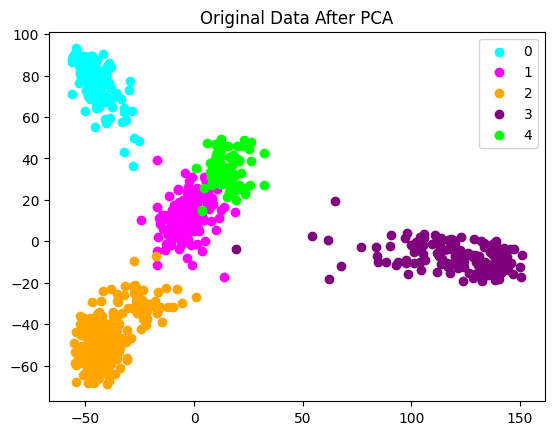

In [ ]:
expression_file = "expressions.txt"
labels_file = "tcga-pancan-hiseqlabels.csv"

# load and preprocess data
data, types = load_data(expression_file, labels_file)
types = preprocess_types(types)

# visualizing the original data with PCA
visualize_pca(data, types, "Original Data After PCA")

In [ ]:
# training and testing sets
dataTrain, dataTest, typeTrain, typeTest = train_test_split(data, types, test_size=0.2, random_state=42)

# standardize the data
dataTrain, dataTest = standardize_data(dataTrain, dataTest)

# training perceptron model
perceptron = train_perceptron(dataTrain, typeTrain)


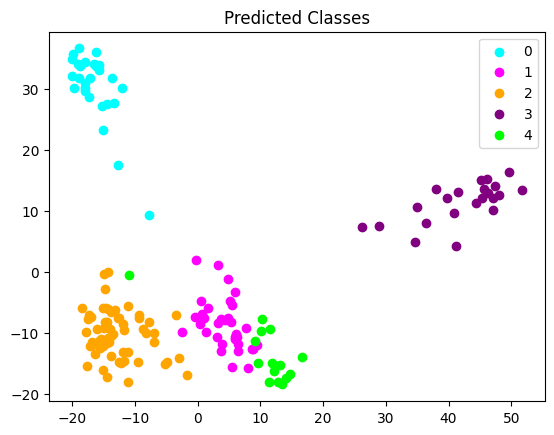

Prediction accuracy is 99.37106918238993 %


In [ ]:
# predict and visualize results
typesPredicted = perceptron.predict(dataTest)
visualize_pca(dataTest, typesPredicted, "Predicted Classes")

# print accuracy of the prediction
accuracy = accuracy_score(typeTest, typesPredicted) * 100
print("Prediction accuracy is", accuracy, "%")


In [ ]:
important_genes = analyze_gene_importance(perceptron, dataTrain, dataTest, typeTrain, typeTest)
for tumor, accuracy in important_genes:
  print(f"The accuracy for tumor {tumor} is {accuracy} %")

The accuracy for tumor 0 is 96.22641509433963 %
The accuracy for tumor 1 is 86.79245283018868 %
The accuracy for tumor 2 is 71.69811320754717 %
The accuracy for tumor 3 is 88.67924528301887 %
The accuracy for tumor 4 is 99.37106918238993 %
